# Imports

In [1]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import datacube
dc = datacube.Datacube(config='/g/data/u46/users/brl654/datacube/simoncube.conf')

# Functions

In [2]:
def numpy_to_xarray(array, geobox, name=None):
    """Utility to convert ndarray to DataArray, using a datacube.model.GeoBox"""
    import xarray
    coords=[xarray.Coordinate(x, geobox.coords[x].values, attrs=dict(units=geobox.coords[x].units)) 
            for x in geobox.dims]
    return xarray.DataArray(array, coords=coords, attrs=dict(crs=geobox.crs), name=name)

def rasterfile_to_xarray(file, geobox, name=None, nodata=None, src_nodata=None):
    """Blit like"""
    import rasterio
    with rasterio.open(file) as src:
        assert src.indexes == (1,) # assume single band
        band = rasterio.band(src, 1) # do not attempt to read entire extent into memory
        array = np.empty((geobox.height, geobox.width), dtype=band.dtype)
        rasterio.warp.reproject(source=band,
                                destination=array,
                                dst_crs=geobox.crs.crs_str,
                                dst_transform=geobox.affine,
                                dst_nodata=nodata,
                                src_nodata=src_nodata)
    return numpy_to_xarray(array, geobox, name)

# Find and inspect one layer

In [3]:
ds = dc.find_datasets(product='s1_gamma0_scene')[125] # grab metadata record concerning an example dataset/layer
ds.center_time # find what time it corresponds to

datetime.datetime(2016, 12, 16, 19, 52, 19, 39377)

This part of the code reads in the data

In [4]:
lon = 145.5895, 146.0649
lat = -17.53, -16.7007
x = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, time=ds.center_time, output_crs='epsg:3577', resolution=(-25,25)) # load that one layer
x

<xarray.Dataset>
Dimensions:  (time: 1, x: 2413, y: 3861)
Coordinates:
  * time     (time) datetime64[ns] 2016-12-16T19:52:19.039377
  * y        (y) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
  * x        (x) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
Data variables:
    vh       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    vv       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      epsg:3577

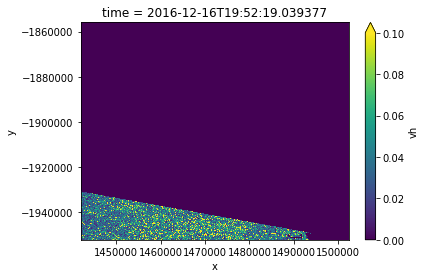

In [5]:
x.vh[:,::2,::2].plot(vmax=0.1)

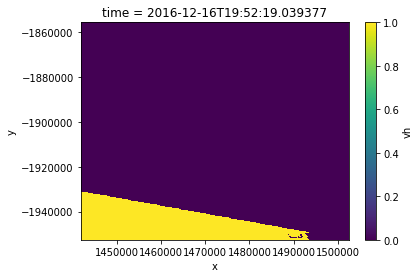

In [6]:
(x.vh != x.vh.nodata)[:,::10,::10].plot()

# (old code) Obtain all layers 
Now revised below to run faster as this code 
Expected to take 5 to 10 minutes: - 

z = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, output_crs='epsg:3577', resolution=(-25,25))

import pickle
with open('/g/data1/w85/sj9724/xarray.pickle', 'wb') as file:
    pickle.dump(z, file, protocol=-1) # write xarray to disk

with open('/g/data1/w85/sj9724/xarray.pickle', 'rb') as file:
    z = pickle.load(file) # this only takes tens of seconds. (~6GB)

# Reset. Clear everything in memory and start again with All Layers

Note this command clears EVERYTHING, so need to reload modules

# Obtain All Layers 

In [7]:
%reset -f

In [8]:
#Imports - 
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import datacube
dc = datacube.Datacube(config='/g/data/u46/users/brl654/datacube/simoncube.conf')

In [9]:
#Define Functions - 
def numpy_to_xarray(array, geobox, name=None):
    """Utility to convert ndarray to DataArray, using a datacube.model.GeoBox"""
    import xarray
    coords=[xarray.Coordinate(x, geobox.coords[x].values, attrs=dict(units=geobox.coords[x].units)) 
            for x in geobox.dims]
    return xarray.DataArray(array, coords=coords, attrs=dict(crs=geobox.crs), name=name)

def rasterfile_to_xarray(file, geobox, name=None, nodata=None, src_nodata=None):
    """Blit like"""
    import rasterio
    with rasterio.open(file) as src:
        assert src.indexes == (1,) # assume single band
        band = rasterio.band(src, 1) # do not attempt to read entire extent into memory
        array = np.empty((geobox.height, geobox.width), dtype=band.dtype)
        rasterio.warp.reproject(source=band,
                                destination=array,
                                dst_crs=geobox.crs.crs_str,
                                dst_transform=geobox.affine,
                                dst_nodata=nodata,
                                src_nodata=src_nodata)
    return numpy_to_xarray(array, geobox, name)

In [10]:
ds = dc.find_datasets(product='s1_gamma0_scene')[125] # grab metadata record concerning an example dataset/layer
ds.center_time # find what time it corresponds to

datetime.datetime(2016, 12, 16, 19, 52, 19, 39377)

In [11]:
lon = 145.5895, 146.0649
lat = -17.53, -16.7007
x = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, time=ds.center_time, output_crs='epsg:3577', resolution=(-25,25)) # load that one layer
x

<xarray.Dataset>
Dimensions:  (time: 1, x: 2413, y: 3861)
Coordinates:
  * time     (time) datetime64[ns] 2016-12-16T19:52:19.039377
  * y        (y) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
  * x        (x) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
Data variables:
    vh       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    vv       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      epsg:3577

# (new code) .... Revised section - Obtain all Layers

In [12]:
#cache = '/g/data/u46/users/brl654/radar/larry_gradproj/xarray.pickle.2'
#cache = '/g/data1/w85/sj9724/xarray.pickle'
cache = '/g/data/u46/users/sj9724/xarray.pickle.2'
try:
    with open(cache, 'rb') as file:
        z = pickle.load(file) # this only takes tens of seconds. (6GB)
except:
    # this may be 5 to 10 mintues (seeking through half a terabyte)
    z = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, output_crs='epsg:3577', resolution=(-25,25))
    with open(cache, 'wb') as file:
        pickle.dump(z, file, protocol=-1) # save result to disk

# Count observations
Patterns in the observation count often explain flaws in downstream products.

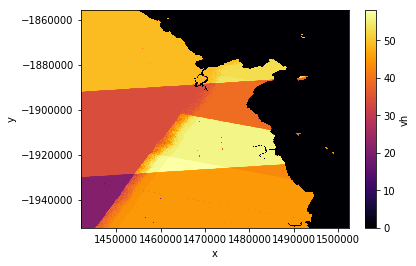

In [13]:

counts = (z.vh!=z.vh.nodata).sum(dim='time')
counts[::4,::4].plot(cmap='inferno')

# Average signal
A naive mean will fail to account for different numbers of observations in different areas.

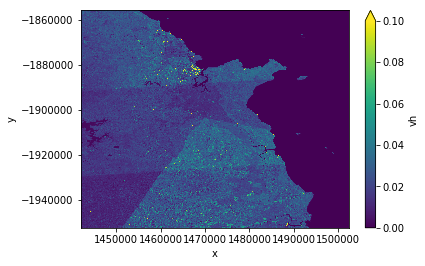

In [14]:
z.vh[:,::4,::4].mean(dim='time').plot(vmax=0.1)

This bit tells me what the 'no data' value is for this dataset

In [15]:
#x.vh.nodata

/g/data/v10/public/modules/agdc-py3-env/20170904/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


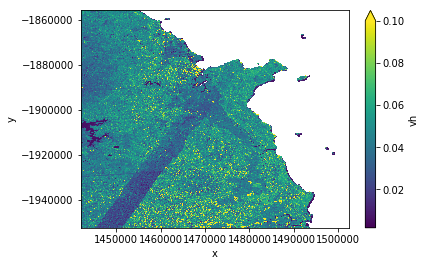

In [16]:
average = (z.vh[:,::4,::4].sum(dim='time') / counts)
average.plot(vmax=0.1)

# Problem 1 - Steps - Identification - Solution

The above image has a strip of "problem" data. 
The following steps were taken to identify the problem -

average[700:800,100:200].plot(vmax=0.1) # Zooming in on a section of the problem area

counts[::4,::4][700:800,100:200].plot() #Looking for all x all y every 4th step

Next -

Looking at the times where nodata - identify layers to zoom into - 

(z.vh!=z.vh.nodata)[:,::4,::4][:,700:800,100:200].sum(dim=['x','y']).plot(marker='o') 

Following 3 steps - analysis and comparison of images to identify 'problem' time steps 1a. Look at last 10 time layers - 5 columns then wrap to next 5 - identify images that show 'bleeding' between areas of data/nodata 1b.Displaying the 'bleeding' time images 2.

(z.vh!=z.vh.nodata)[:,::4,::4][-10:,700:800,100:200].plot(col='time', col_wrap=5) #1a.

(z.vh!=z.vh.nodata)[:,::4,::4][-10:,700:800,100:200].time #1b.show the time of the 'bleeding' images

(z.vh)[:,::4,::4][-10:,700:800,100:200].plot(col='time', col_wrap=5, vmax=0.1)

# Problem 1 - Identified - 
areas where the data is very close to zero but not quite zero

problem = z.sel(time='2017-04-10T19:44:05.949922000').vh[::4,::4].copy()
problem.data[problem.data==0] = np.nan
problem.plot(vmax=0.00001)
(problem < 0.0001).plot() # problem identified - areas where the data is very close to zero but not quite

# Problem 1 - Solution -
We now run the same script that produced the 'problem' image but define where there is data >0.001.  Voilà! Clean image

/g/data/v10/public/modules/agdc-py3-env/20170904/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: divide by zero encountered in true_divide
  if not reflexive
/g/data/v10/public/modules/agdc-py3-env/20170904/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


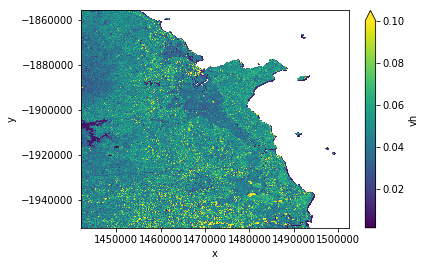

In [17]:
new_counts = (z.vh>0.001).sum(dim='time')
new_average = (z.vh.sum(dim='time') / new_counts)
new_average.plot(vmax=0.1)

In [18]:
# write out the pickled file
with open('/g/data/u46/users/sj9724/average_radar', 'wb') as file:
    radar = pickle.dump(new_average, file)

# Clear everything in memory and start over with the created files
Note this command clears EVERYTHING, so need to reload modules

In [1]:
%reset -f

In [2]:
#Imports - 
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import datacube
import pandas as pd
dc = datacube.Datacube(config='/g/data/u46/users/brl654/datacube/simoncube.conf')
import seaborn as sns

In [3]:
#Define Functions - 
def numpy_to_xarray(array, geobox, name=None):
    """Utility to convert ndarray to DataArray, using a datacube.model.GeoBox"""
    import xarray
    coords=[xarray.Coordinate(x, geobox.coords[x].values, attrs=dict(units=geobox.coords[x].units)) 
            for x in geobox.dims]
    return xarray.DataArray(array, coords=coords, attrs=dict(crs=geobox.crs), name=name)

def rasterfile_to_xarray(file, geobox, name=None, nodata=None, src_nodata=None):
    """Blit like"""
    import rasterio
    with rasterio.open(file) as src:
        assert src.indexes == (1,) # assume single band
        band = rasterio.band(src, 1) # do not attempt to read entire extent into memory
        array = np.empty((geobox.height, geobox.width), dtype=band.dtype)
        rasterio.warp.reproject(source=band,
                                destination=array,
                                dst_crs=geobox.crs.crs_str,
                                dst_transform=geobox.affine,
                                dst_nodata=nodata,
                                src_nodata=src_nodata)
    return numpy_to_xarray(array, geobox, name)

In [4]:
#Bring in the averaged radar file to start analysis
import pickle
with open('/g/data/u46/users/sj9724/average_radar', 'rb') as file:
    radar = pickle.load(file) 


In [5]:
ds = dc.find_datasets(product='s1_gamma0_scene')[125] # grab metadata record concerning an example dataset/layer
ds.center_time # find what time it corresponds to
lon = 145.5895, 146.0649
lat = -17.53, -16.7007
x = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, time=ds.center_time, output_crs='epsg:3577', resolution=(-25,25)) # load that one layer
mz = rasterfile_to_xarray('/g/data/u46/users/sj9724/Landsat_mz_terrain_Larry/mz_orig.img', x.geobox, nodata=np.nan, src_nodata=-999.5)
cats = rasterfile_to_xarray('/g/data/u46/users/sj9724/Landsat_mz_terrain_Larry/terrain.img', x.geobox)

/g/data/v10/public/modules/agdc-py3-env/20170904/envs/agdc/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Coordinate has been deprecated. Use IndexVariable instead.
  


In [6]:
radar

<xarray.DataArray 'vh' (y: 3861, x: 2413)>
array([[ 0.058703,  0.048061,  0.047167, ...,       nan,       nan,       nan],
       [ 0.065165,  0.041612,  0.065336, ...,       nan,       nan,       nan],
       [ 0.044582,  0.049872,  0.060463, ...,       nan,       nan,       nan],
       ..., 
       [ 0.058156,  0.049555,  0.03814 , ...,       nan,       nan,       nan],
       [ 0.065107,  0.060459,  0.039052, ...,       nan,       nan,       nan],
       [ 0.050861,  0.056078,  0.045852, ...,       nan,       nan,       nan]])
Coordinates:
  * y        (y) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
  * x        (x) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...

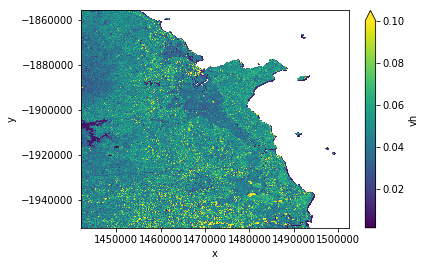

In [7]:
radar.plot(vmax=0.1)

In [8]:
mz

<xarray.DataArray (y: 3861, x: 2413)>
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ..., 
       [ 0.959,  0.959,  0.959, ...,  0.973,  0.973,  0.973],
       [ 0.945,  0.959,  0.959, ...,  0.973,  0.973,  0.973],
       [ 0.959,  0.959,  0.959, ...,  0.973,  0.973,  0.973]], dtype=float32)
Coordinates:
  * y        (y) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
  * x        (x) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
Attributes:
    crs:      epsg:3577

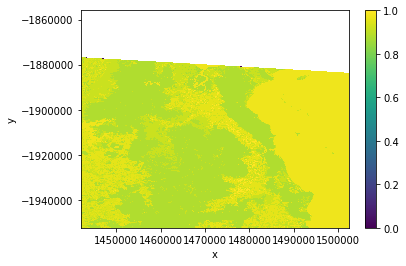

In [9]:
mz.plot()

# Now we want to plot a scatter of radar vs Mz data

In [10]:
# Need to get the radar and cats data into a single list by 'flattening' the data using- 
flatcats = cats.stack(i = ('x','y'))
flatmz = mz.stack(i = ('x','y'))
flatradar = radar.stack(i = ('x','y'))
# Check that they are still looking good
print(flatcats)
print(flatmz) 
print(flatradar)

<xarray.DataArray (i: 9316593)>
array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)
Coordinates:
  * i        (i) MultiIndex
  - x        (i) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
  - y        (i) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
Attributes:
    crs:      epsg:3577
<xarray.DataArray (i: 9316593)>
array([   nan,    nan,    nan, ...,  0.973,  0.973,  0.973], dtype=float32)
Coordinates:
  * i        (i) MultiIndex
  - x        (i) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
  - y        (i) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
Attributes:
    crs:      epsg:3577
<xarray.DataArray 'vh' (i: 9316593)>
array([ 0.058703,  0.065165,  0.044582, ...,       nan,       nan,       nan])
Coordinates:
  * i        (i) MultiIndex
  - x        (i) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
  - y        (i) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...


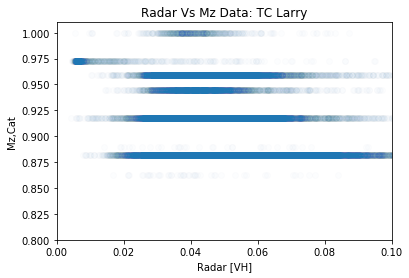

In [11]:
#If they are looking good, we can now do our scatter plot
fig, ax = plt.subplots()
ax.scatter(flatradar[::100], flatmz[::100] , alpha = 0.01)


# We want to limit the xaxis scale to 0-0.10 - xlimit?
ax.set_xlim([0, 0.10])
ax.set_ylim([0.8,1.01])

#Add axes labels (radar and Mzcat)(label categ.)
ax.set_xlabel('Radar [VH]')
ax.set_ylabel('Mz,Cat')
ax.set_title('Radar Vs Mz Data: TC Larry')
plt.show()

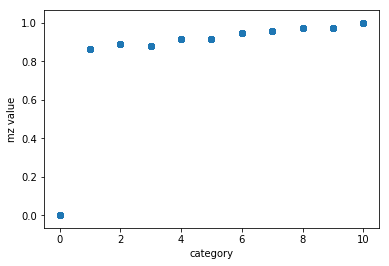

In [12]:
plt.scatter(flatcats.data[::10], flatmz.data[::10])
plt.xlabel('category')
plt.ylabel('mz value')
plt.show()

# Produce histograms of flat data to interrogate results of scatter plot

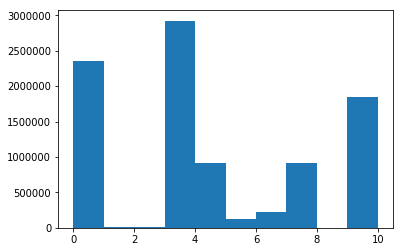

In [13]:
plt.hist(flatcats, 10) # plot flattened categories - flatcat
plt.show()

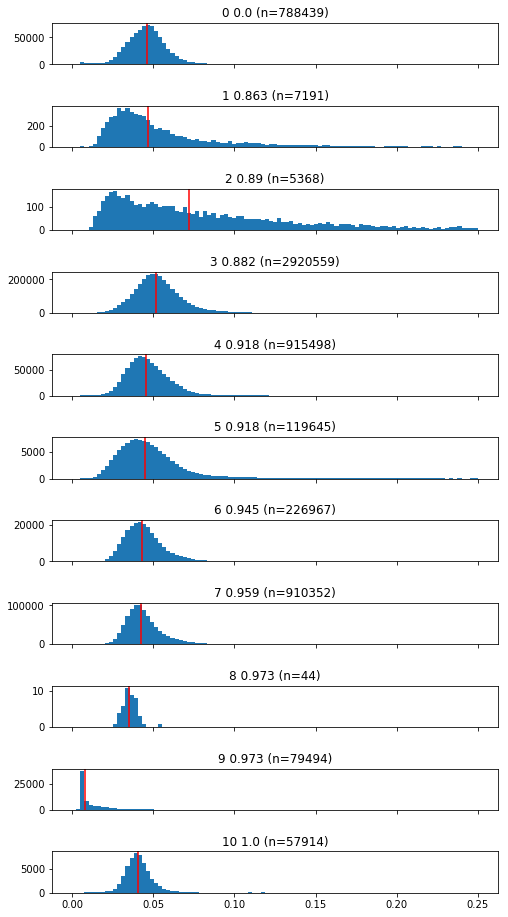

In [14]:
def nanfree(x):
    return x[~np.isnan(x)]
def clean(x):
    return x[np.isfinite(x)]


#plt.hist(subset, bins=np.linspace(0,0.25,100))
#plt.show()

fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(8,16), sharex=True)
axes = axes.ravel()

for i, ax in zip(range(11), axes):
    subset = clean(flatradar.data[flatcats.data == i])
    medi = np.median(subset)
    mz_i = np.unique(clean(flatmz.data[flatcats.data == i])) # find corresponding mz value
    #print(mz_i)
    assert len(mz_i) == 1
    mz_i = mz_i[0]
    
    ax.hist(subset, bins=np.linspace(0,0.25,100))
    ax.axvline(medi, color='r')
    ax.set_title(str(i) + ' ' + str(mz_i) + ' (n=' + str(len(subset)) + ')')


fig.subplots_adjust(hspace=1)
plt.show()

In [15]:
#Remove NaN's and inf from data before plotting histogram of flatmz
#1. Id NaN's

def nanfree(mz):
    return x[~np.isnan(mz)]
def clean(mz):
    return x[np.isfinite(mz)]
#mznan = flatmz.dropna(dim = '?')
#nanlist = np.argwhere(pd.isnull(mznan))
#nanlist
# Identify NaN's in flat mz
mznan = flatmz.dropna(dim = 'i')
nanlist = np.argwhere(pd.isnull(mznan))
nanlist

array([], shape=(0, 1), dtype=int64)

In [16]:
#Remove infinites (inf) from data
mznan.loc[~np.isfinite(mznan)] = np.nan
mznan = mznan.dropna(dim = 'i')

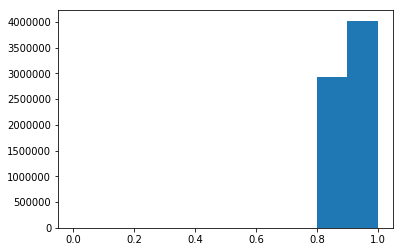

In [17]:
plt.hist(mznan, 10) # plot flattened Mz,cat - flatmz
plt.show()

In [18]:
# Identify NaN's in flat radar
radarnan = flatradar.dropna(dim = 'i')
nanlist = np.argwhere(pd.isnull(radarnan))
nanlist

array([], shape=(0, 1), dtype=int64)

In [19]:
#Remove infinites (inf) from data
radarnan.loc[~np.isfinite(radarnan)] = np.nan
radarnan = radarnan.dropna(dim = 'i')

In [ ]:
plt.hist(radarnan, bins=np.linspace(0,1,100)) # A histogram of our flat radar data after NaNs are removed.
plt.xlabel('radar')
plt.ylabel('count')
plt.show()

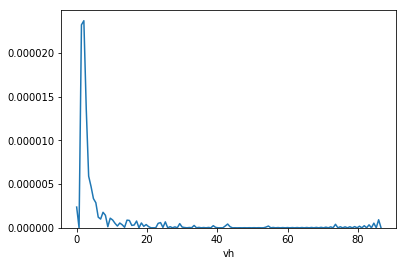

In [21]:
sns.distplot(radarnan, hist=False)

# Count observations
Patterns in the observation count often explain flaws in downstream products.

In [22]:
cache = '/g/data/u46/users/sj9724/xarray.pickle'
lon = 145.5895, 146.0649
lat = -17.53, -16.7007 # call for partial Larry area
try:
    with open(cache, 'rb') as file:
        z = pickle.load(file) # this only takes tens of seconds. (6GB)
except:
    # this may be 5 to 10 mintues (seeking through half a terabyte)
    z = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, output_crs='epsg:3577', resolution=(-25,25))
    with open(cache, 'wb') as file:
        pickle.dump(z, file, protocol=-1) # save result to disk

In [23]:
z.keys()

KeysView(<xarray.Dataset>
Dimensions:  (time: 93, x: 2413, y: 3861)
Coordinates:
  * time     (time) datetime64[ns] 2014-10-06T08:43:58.206693 ...
  * y        (y) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
  * x        (x) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
Data variables:
    vh       (time, y, x) float32 0.0635385 0.0297324 0.0223437 0.0463795 ...
    vv       (time, y, x) float32 0.238647 0.18387 0.0931985 0.205559 ...
Attributes:
    crs:      epsg:3577)

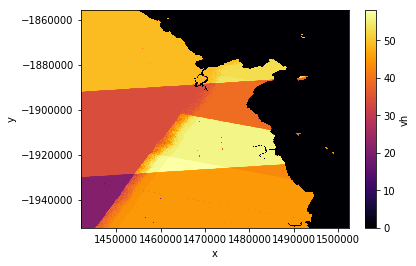

In [24]:
counts = (z.vh!=z.vh.nodata).sum(dim='time')
counts[::4,::4].plot(cmap='inferno')

In [25]:
z.time

<xarray.DataArray 'time' (time: 93)>
array(['2014-10-06T08:43:58.206693000', '2014-10-30T08:43:57.928756000',
       '2014-11-23T08:43:57.770907000', '2014-12-17T08:43:57.017649000',
       '2015-01-10T08:43:56.073692000', '2015-02-25T19:51:44.503824000',
       '2015-02-25T19:52:09.503993000', '2015-03-04T19:43:50.265997000',
       '2015-03-11T08:43:55.307314000', '2015-04-04T08:43:55.874061000',
       '2015-04-28T08:43:57.196113000', '2015-05-22T08:43:58.429927000',
       '2015-06-15T08:44:00.061278000', '2015-07-09T08:44:00.070053000',
       '2015-08-02T08:44:01.953326000', '2015-08-26T08:44:03.160536000',
       '2015-09-19T08:44:03.889216000', '2015-10-13T08:44:04.381575000',
       '2015-12-05T19:44:04.320915000', '2015-12-24T08:43:57.074251000',
       '2016-01-17T08:43:56.391507000', '2016-02-10T08:43:55.645043000',
       '2016-03-05T08:43:55.930043000', '2016-03-15T19:51:51.400738000',
       '2016-03-15T19:52:16.401067000', '2016-03-29T08:43:56.457950000',
       '2016-0

['2017-03-05T19:44:04.895119000' '2017-03-10T19:51:51.316742000'
 '2017-03-10T19:52:16.316473000' '2017-03-17T19:44:05.187420000'
 '2017-03-22T19:51:52.531304000' '2017-03-22T19:52:17.531710000'
 '2017-03-29T19:44:05.401794000']


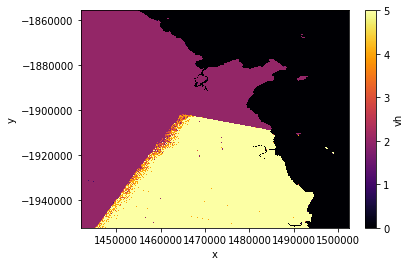

In [26]:
#time_slice = slice(None,'2016-11-12T19:36:30.178718000')
time_slice = slice('2017-02-28','2017-03-31')
z_subset = z.sel(time=time_slice)
print(z_subset.time.values)
(z_subset.vh!=z_subset.vh.nodata).sum(dim='time')[::4,::4].plot(cmap='inferno')

In [27]:
# Need to get the radar and cats data into a single list by 'flattening' the data using- 
flatcats = cats.stack(i = ('x','y'))
flatmz = mz.stack(i = ('x','y'))
flatradar = radar.stack(i = ('x','y'))
# Check that they are still looking good
print(flatcats)
print(flatmz) 
print(flatradar)

<xarray.DataArray (i: 9316593)>
array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)
Coordinates:
  * i        (i) MultiIndex
  - x        (i) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
  - y        (i) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
Attributes:
    crs:      epsg:3577
<xarray.DataArray (i: 9316593)>
array([   nan,    nan,    nan, ...,  0.973,  0.973,  0.973], dtype=float32)
Coordinates:
  * i        (i) MultiIndex
  - x        (i) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
  - y        (i) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
Attributes:
    crs:      epsg:3577
<xarray.DataArray 'vh' (i: 9316593)>
array([ 0.058703,  0.065165,  0.044582, ...,       nan,       nan,       nan])
Coordinates:
  * i        (i) MultiIndex
  - x        (i) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
  - y        (i) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...


In [28]:
good_subset = np.isfinite(radar) & np.isfinite(mz)
good_radar = radar.data[good_subset]
good_mz = mz.data[good_subset]
#good_both = np.vstack([good_radar, good_mz])
df = pd.DataFrame(data=dict(radar_column=good_radar, mz_column=good_mz))
mapping = {1063:'bare', 1000:'water', 949:'grassy', 898:'woodland', 806:'urban', 774:'forest'}
df['mz_label'] = df.mz_column.map(mapping)
df.head() # only show a few rows

,mz_column,radar_column,mz_label
0,0.000,0.032123,NaN
1,0.918,0.052187,NaN
2,0.918,0.043370,NaN
3,0.000,0.038344,NaN
4,0.000,0.045691,NaN


In [29]:
smaller = df.iloc[::10]
#len(smaller)
ax = sns.violinplot(data=smaller, x='radar_column', y='mz_label', scale="area")#, cut=0)#, bw=20)
#ax.set_xlim([0,0.1])

KeyboardInterrupt: 